# Initial mortality and recovery in reported cases of COVID-19 

## Carlos Ignacio Herrera-Nolasco$^1$, Alejandro Joel Herrera-McKiernan$^2$, 
## Emilio Arieli Herrera-McKiernan$^3$, Eugenia O'Reilly-Regueiro$^4$,
## Marco Arieli Herrera-Valdez$^1$

#### $^1$ Departamento de Matemáticas, Facultad de Ciencias, Universidad Nacional Autónoma de México
#### $^2$ Escuela Primaria República de Guatemala, Secretaría de Educación Pública, México
#### $^3$ Escuela Secundaria Vicente Guerrero, Secretaría de Educación Pública, Mexico
#### $^4$ Instituto de Matemáticas, Facultad de Ciencias, Universidad Nacional Autónoma de México


#### Abstract

We inspected the time series of the cases, deaths, and recovered. We also calculated the case fatality ratios of the COVID-19 epidemic from different countries and examine their magnitudes in an attempt to provide comparative information about the fatality associated to the epidemic. Although the sampling for cases in many countries is biased to those people that sought medical attention, the case fatality ratios provide an estimate for the mortality rate for infected individuals. 


#### Methods and data sources

The data was downloaded from the repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) (https://github.com/CSSEGISandData/COVID-19). All calculations were performed using Python version 3.82 (https://www.python.org/) and the modules numpy (https://numpy.org/), matplotlib (https://matplotlib.org/), and pandas (https://pandas.pydata.org/). 



Data preparation and module imports

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pylab as gr
import matplotlib.dates as mdates
import datetime

In [176]:
srcDir='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
urlCases = srcDir+'time_series_covid19_confirmed_global.csv'
urlDeaths = srcDir+'time_series_covid19_deaths_global.csv'
urlRecov = srcDir+'time_series_covid19_recovered_global.csv'
cases = pd.read_csv(urlCases,index_col=None)
deaths = pd.read_csv(urlDeaths,index_col=None)
recov = pd.read_csv(urlRecov,index_col=None)

Let us first describe the data set. The data has been transposed so that the cases, deaths, and recovered the different regions of the world are stored in columns, each with the data from different dates starting from January 22, 2020. 

In [177]:
cases.head(6)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,1,1,1,3,3,3,7,7,7,7


In [178]:
cases.tail(4)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4
252,NaN,MS Zaandam,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2


This means there are 4 columns before the time series begins, and the data contains 248 regions from the world. The data that can be used for calculations involving the cases in the epidemic can be found from the fifth row on.  Since the dates in the original data have only two numbers for the year, let us create a date range with the dates formatted with a four figures, and use the new dates later for the plots and illustrations.

The rows that contain the data from China, for instance, are between 42 and 82, inclusive.

In [179]:
deaths.iloc[48:83,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
48,NaN,Chile,-35.6751,-71.5430,0,0,0,0,0,0,...,0,0,1,2,2,3,4,5,6,7
49,Anhui,China,31.8257,117.2264,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
50,Beijing,China,40.1824,116.4142,0,0,0,0,0,1,...,8,8,8,8,8,8,8,8,8,8
51,Chongqing,China,30.0572,107.8740,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
52,Fujian,China,26.0789,117.9874,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
53,Gansu,China,37.8099,101.0583,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
54,Guangdong,China,23.3417,113.4244,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
55,Guangxi,China,23.8298,108.7881,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
56,Guizhou,China,26.8154,106.8748,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
57,Hainan,China,19.1959,109.7453,0,0,0,0,0,1,...,6,6,6,6,6,6,6,6,6,6


In [180]:
# ------------------------------
# Description of the data so that the headers and the columns
# without case data are distinguished
# ------------------------------
nRows,nCols=cases.shape
cases.head(10)
nHeaderRows=1; 
# 
nHeaderCols=3
# how to generate date lists from a baseline using the datetime
#base = datetime.datetime(2020, 1, 22)
#dates = np.array([base + datetime.timedelta(days=i) for i in range(nDays)])
dates = cases.columns[4:]
nDays = len(dates)
print('Dates:\n',dates)

Dates:
 Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20'],
      dtype='object')


In [181]:
# -------------------
print("""""")
# -------------------
npCases = cases.to_numpy()
countries = np.unique(npCases[:,1])
nCountries = len(countries)

Data curation observations.
- Some countries report by province. This allows examination of the time series with a better spatial resolution.
The countries where there are reports by province are China, United Kingdom, Australia, and Canada.
- Arrays that include whole country cases, deaths, and recovered obtained
and separated for analysis
- Recovered are treated separately because reports do not include as many places as cases or deaths
- Case fatality ratios are calculated to analyse the epidemia in different provinces and contrast with whole country estimates


In [182]:
# -------------------
# Ordering data to gather same country data
# -------------------
def sortDataByCountry(df,nHeaderCols=4):
    iCoun= df.iloc[:,1].to_numpy().argsort()
    x = df.iloc[iCoun,nHeaderCols:].to_numpy()
    places = df.iloc[iCoun,1].to_numpy()
    return x, places

In [183]:
jCases, countries_Cases= sortDataByCountry(cases, nHeaderCols)
jDeaths,countries_Deaths = sortDataByCountry(deaths, nHeaderCols)
jRecov,countries_Recov = sortDataByCountry(recov, nHeaderCols)

In [184]:
# -------------------
# Ordering data to gather and sum the data from the same country
# -------------------
def gatherDataByCountry(df,nHeaderCols=4):
    cc = df.iloc[:,1].to_numpy()
    countries = np.unique(df.iloc[:,1].to_numpy())
    nCountries = len(countries);
    x = list()
    for n in range(nCountries):
        iC= np.where(cc== countries[n])[0]
        a =df.iloc[iC,nHeaderCols:].to_numpy()
        x.append(a.sum(0))
    return np.array(x)

In [185]:
# These arrays have the same size as the countries array (unique countries)
totCases=gatherDataByCountry(df=cases,nHeaderCols=4)
totDeaths=gatherDataByCountry(df=deaths,nHeaderCols=4)
totRecov=gatherDataByCountry(df=recov,nHeaderCols=4)


## Case-fatality ratios 

In [186]:
def correctedArrayRatio(a,b):
    bCorr= b.copy()
    bCorr[bCorr==0]=1
    return a/np.maximum(b,bCorr)

The case fatality ratio is an approximation for the probability of death among cases in an epidemic. In fact, it is an upper bound for the proportion of deaths due to infection, assuming that people that have not been confirmed do not have a higher probability of dying because of the infection.

The case-fatality ratios can be calculated by dividing each entry in the deaths data frame, by the corresponding entry in the cases data frame.


In [187]:
cfr= correctedArrayRatio(totDeaths,totCases)

Functions to find indices of countries 

In [188]:
def getIndsRegion(region):
    i = [np.where(countries==region[nn])[0][0] for nn in range(len(region))]
    return i

def getIndsRegions(regions):
    ii =list()
    for mm in range(len(regions)):
        reg = regions[mm]
        print(reg)
        ii.append(getIndsRegion(reg))
    return ii


Search regions to illustrate the case-fatality ratios

In [189]:
Asia=['China','Japan','Indonesia','Korea, South','Singapore','Thailand']
America=['Mexico','US','Argentina','Brazil','Colombia','Chile']
Africa=['Niger','Algeria','Egypt','Chad']
Europe=['Spain','Italy','France','Germany',]
CommonWealth=['Australia','United Kingdom','Canada']
MiddleEast =['Iran','Lebanon', 'West Bank and Gaza','Israel']
regions=[Asia,America,Africa,Europe,CommonWealth,MiddleEast]
ii = getIndsRegions(regions)

['China', 'Japan', 'Indonesia', 'Korea, South', 'Singapore', 'Thailand']
['Mexico', 'US', 'Argentina', 'Brazil', 'Colombia', 'Chile']
['Niger', 'Algeria', 'Egypt', 'Chad']
['Spain', 'Italy', 'France', 'Germany']
['Australia', 'United Kingdom', 'Canada']
['Iran', 'Lebanon', 'West Bank and Gaza', 'Israel']


Now let us plot the case fatality ratios of a few countries with reported cases. 

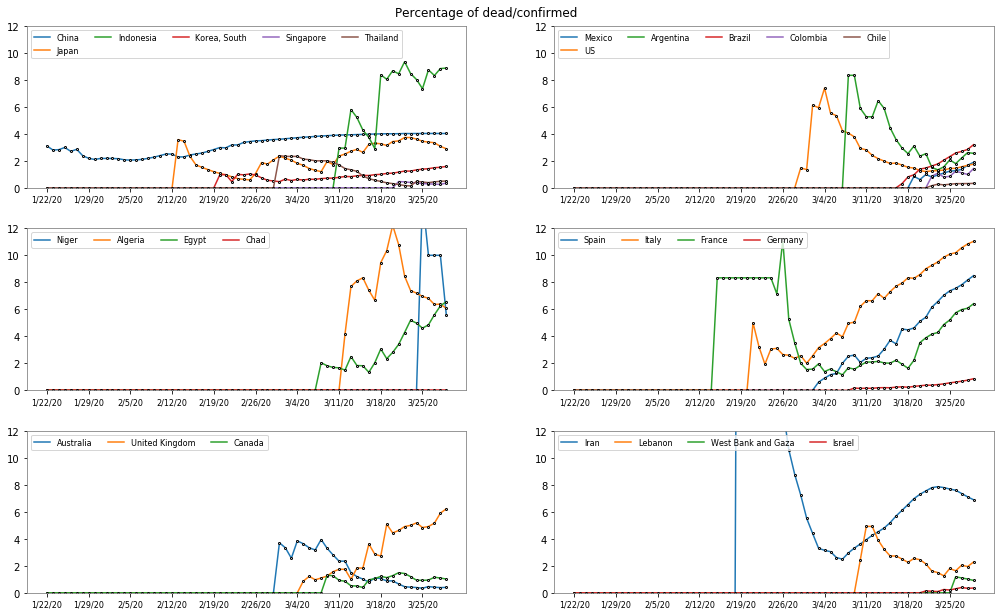

In [190]:
#
figu = gr.figure(figsize=(15,9))
figu.suptitle('Percentage of dead/confirmed')
ax=list(); gr.ioff()
cols=2
rows = np.int32(np.ceil(len(regions)/cols))
ticks= np.arange(0,nDays,7)
for n in range(len(regions)):
    ax.append(figu.add_subplot(rows,cols,n+1))
    j=ii[n]
    for nn in range(len(j)):
        ax[n].plot(100*cfr[j[nn]],'-',label=countries[j[nn]])
        ax[n].plot(100*cfr[j[nn]],'wo',ms=2,mec='k',mfc='w')
    ax[n].set_ylim(0,12)
    ax[n].legend(ncol=5,loc='upper left',fontsize=8)
    ax[n].set_xticks(ticks)
    ax[n].set_xticklabels(dates[ticks],{'fontsize':8})
    for label in ax[n].get_xticklabels():
        label.set_rotation(0)
        label.set_horizontalalignment('center')
        label.set_fontsize(8)
figu.subplots_adjust(left=0.075,bottom=0.075,right=0.97,top=0.95,wspace=0.2,hspace=0.25)
gr.ion(); gr.draw(); gr.show()

It is important to consider that the first few reports of deaths usually are biased by the fact that those cases are almost 


### Case fatality ratios in detail for countries reporting cases by province

The countries where there are reports by province are China, United Kingdom, Australia, and Canada. To see this, print the list of countries including repetitions.

In [191]:
countries_Cases

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Australia', 'Australia', 'Australia', 'Australia', 'Australia',
       'Australia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', '